<center><u><H1>Matplotlib-Personalización de Gráficos</H1></u></center>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

## Loading the data:

dataset: https://www.kaggle.com/shivachandel/kc-house-data

In [17]:
data = pd.read_csv('../data/kc_house_data.csv')
df = data.sample(100)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7905,2473350790,20150511T000000,371000.0,3,1.75,1970,9512,1.0,0,0,...,8,1970.0,0,1968,0,98058,47.4545,-122.146,2250,10573
3141,8567300110,20140604T000000,485000.0,3,2.50,2340,59058,1.0,0,0,...,8,2340.0,0,1985,0,98038,47.4052,-122.028,2700,37263
17134,6143000020,20150406T000000,299000.0,3,1.75,1910,17003,1.5,0,0,...,8,1910.0,0,1963,0,98001,47.3095,-122.283,1820,14806
9567,1310700210,20140603T000000,268000.0,3,1.75,1970,10270,1.0,0,0,...,8,1970.0,0,1966,0,98032,47.3619,-122.285,1970,8400
9694,3262301610,20141118T000000,865000.0,3,1.50,1530,10827,1.0,0,0,...,8,1530.0,0,1955,0,98039,47.6354,-122.234,2050,10827


In [18]:
x = df['sqft_living']
y = df['price']

## Visualizing the data with default Matplotlib

Crea una figura y ejes utilizando la función plt.subplots(). Pasa el parámetro figsize para establecer el tamaño de la figura en pulgadas (ancho, alto).

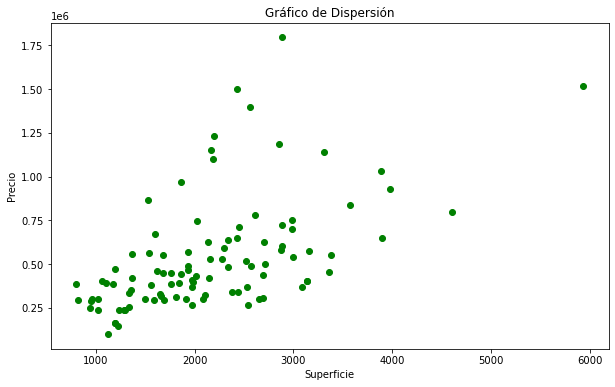

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x, y, color='green')
ax.set_xlabel('Superficie')
ax.set_ylabel('Precio')
ax.set_title('Gráfico de Dispersión')
plt.show()

Llama al método ax.scatter() para crear el gráfico de dispersión. Pasa los datos de los puntos x e y como argumentos. También puedes personalizar el color de los puntos especificando el parámetro color.


Opcionalmente, puedes agregar etiquetas a los ejes x e y y establecer un título para el gráfico utilizando los métodos ax.set_xlabel(), ax.set_ylabel() y ax.set_title() respectivamente.


Finalmente, utiliza plt.show() para mostrar el gráfico completo en una ventana emergente o en el entorno de visualización correspondiente.


## Mejorando la vista:

eliminar los ejes superior y derecho del gráfico, lo cual puede mejorar la apariencia del gráfico

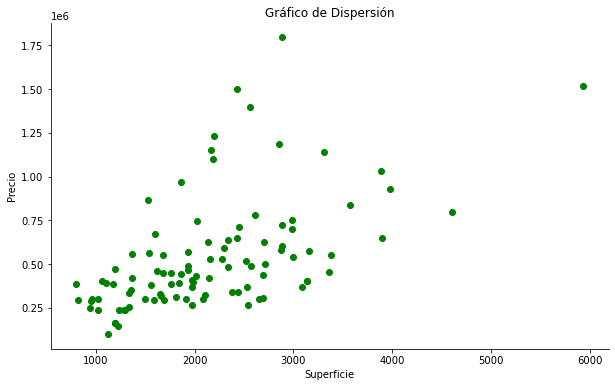

In [26]:
# Remove Spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig

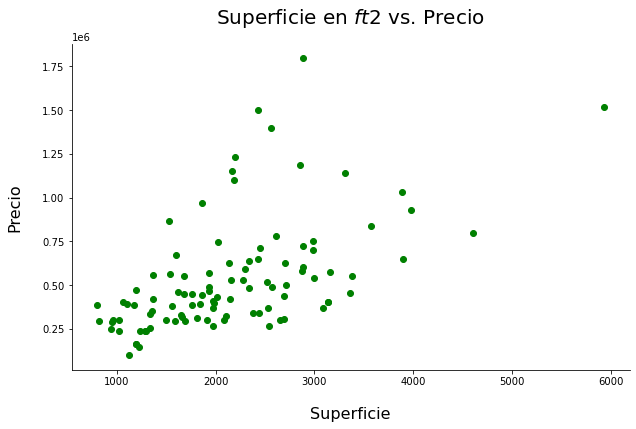

In [28]:
ax.set_title(r'Superficie en $ft2$ vs. Precio', fontsize=20, pad=20)
ax.set_xlabel('Superficie', fontsize=16, labelpad=20)
ax.set_ylabel('Precio', fontsize=16, labelpad=20)
fig

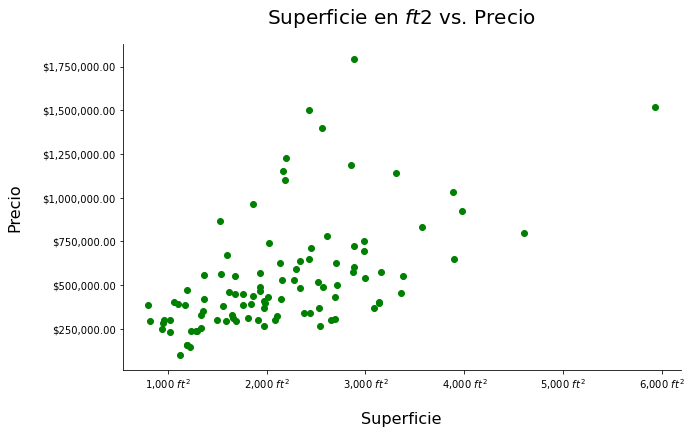

In [29]:
#Add units to Axis labels
y_format = '${x:,.2f}'
y_tick = mtick.StrMethodFormatter(y_format)
ax.yaxis.set_major_formatter(y_tick)

x_format = r'{x:,.0f} $ft^2$'
x_tick = mtick.StrMethodFormatter(x_format)
ax.xaxis.set_major_formatter(x_tick)
fig

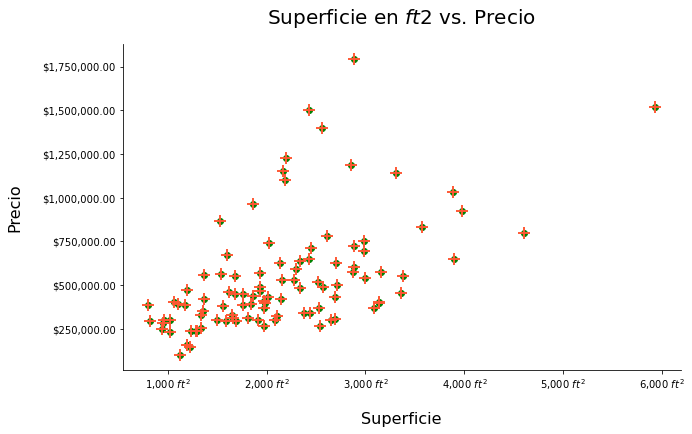

In [33]:
# Change color, marker, size and transparency
ax.scatter(x, y, s=150, marker='+', color='#FF5733', alpha=0.8)
fig

En este ejemplo, se han realizado los siguientes cambios:

s=150: Se establece el tamaño de los marcadores en 150 puntos. Puedes ajustar este valor según tus necesidades.
- marker='+': Se utiliza el marcador "+" en lugar del marcador predeterminado. Puedes elegir otros marcadores disponibles en matplotlib, como "o", "s", "D", etc.
- color='#FF5733': Se cambia el color de los marcadores a un tono de naranja (#FF5733). Puedes especificar el color utilizando diferentes formatos, como nombres de colores en inglés o códigos hexadecimales.
- alpha=0.8: Se establece la transparencia de los marcadores en 0.8 (80%). Puedes ajustar este valor para controlar la opacidad de los marcadores.

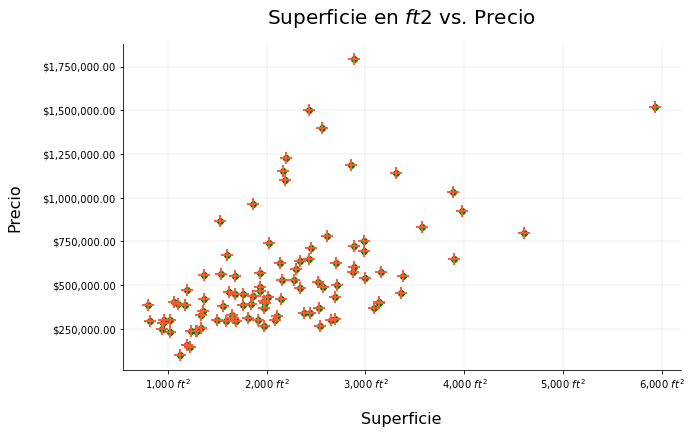

In [34]:
# adding major gridlines
ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
fig

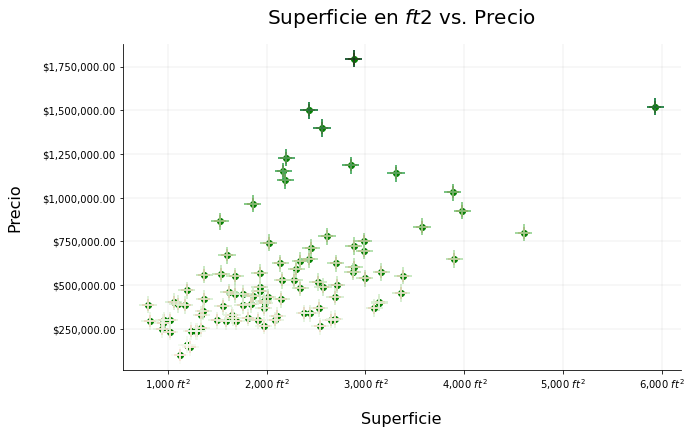

In [36]:
# applying color maps
ax.scatter(x, y, s=300, c=y, marker='+', cmap='Greens', alpha=0.8)
fig

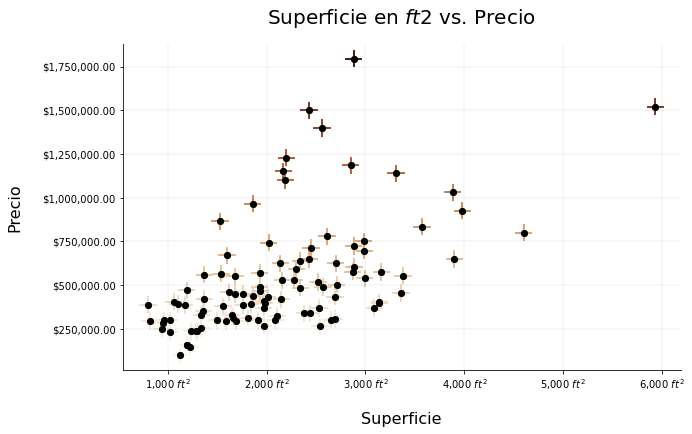

In [37]:
ax.scatter(x, y, s=300, c=y, marker='+', cmap='Reds', alpha=0.8)
ax.scatter(x, y, color='black')
fig

In [38]:
np.corrcoef(x, y)

array([[1.        , 0.55571951],
       [0.55571951, 1.        ]])

In [39]:
# Add legend: correlation coefficient
corr_ = np.round(np.corrcoef(x, y)[0][1], 2)
corr_

0.56

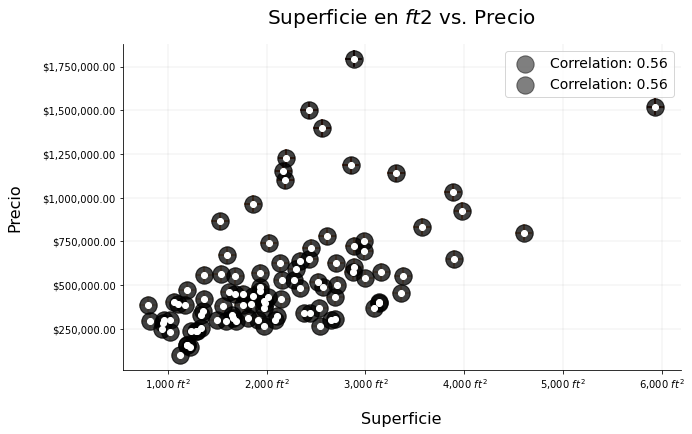

In [41]:
ax.scatter(x, y, s=300, marker='o', color='black', alpha=0.5, label=f'Correlation: {corr_}')
ax.legend(fancybox=True, prop={'size': 14}, loc='best')
ax.scatter(x, y, color='w')
fig